# BINARY CLASSIFICATION

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('C:\\Users\\GPTINF05\\Downloads\\attrition_data.csv')
print('Dataframe shape: ', df.shape)

Dataframe shape:  (9612, 27)


# DATA CLEANUP

In [5]:
df.columns

Index(['EMP_ID', 'ANNUAL_RATE', 'HRLY_RATE', 'JOBCODE', 'ETHNICITY', 'SEX',
       'MARITAL_STATUS', 'JOB_SATISFACTION', 'AGE', 'NUMBER_OF_TEAM_CHANGED',
       'REFERRAL_SOURCE', 'HIRE_MONTH', 'REHIRE', 'TERMINATION_YEAR',
       'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'PERFORMANCE_RATING',
       'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL', 'STATUS',
       'JOB_GROUP', 'PREVYR_1', 'PREVYR_2', 'PREVYR_3', 'PREVYR_4',
       'PREVYR_5'],
      dtype='object')

In [6]:
df.isnull().sum()

EMP_ID                       0
ANNUAL_RATE                  0
HRLY_RATE                    0
JOBCODE                      0
ETHNICITY                    0
SEX                          0
MARITAL_STATUS               0
JOB_SATISFACTION             0
AGE                          0
NUMBER_OF_TEAM_CHANGED       0
REFERRAL_SOURCE            445
HIRE_MONTH                   0
REHIRE                       0
TERMINATION_YEAR          5394
IS_FIRST_JOB                 0
TRAVELLED_REQUIRED           0
PERFORMANCE_RATING           0
DISABLED_EMP                 0
DISABLED_VET                 0
EDUCATION_LEVEL              0
STATUS                       0
JOB_GROUP                    0
PREVYR_1                     0
PREVYR_2                     0
PREVYR_3                     0
PREVYR_4                     0
PREVYR_5                     0
dtype: int64

In [7]:
df.drop(['EMP_ID', 'JOBCODE', 'TERMINATION_YEAR'], axis=1, inplace=True)
df.drop(df.iloc[:, -5:], axis=1, inplace=True)

In [8]:
df['REFERRAL_SOURCE'].fillna(df['REFERRAL_SOURCE'].mode()[0], inplace=True)

In [9]:
df.head()

,ANNUAL_RATE,HRLY_RATE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP
0,33615,22,BLACK,F,Divorced,4,35,3+,Client Referral,June,False,N,N,4,N,N,LEVEL 2,T,Plant & Facilities Maintenance
1,70675,40,ASIAN,M,Single,3,18,3+,Executive Referral,June,False,Y,N,3,N,N,LEVEL 1,A,Customer Care
2,34320,23,WHITE,F,Single,5,18,2,Former Employee/Intern,February,False,Y,N,3,N,N,LEVEL 1,A,Customer Care
3,103199,59,ASIAN,F,Single,2,50,0,Direct Sourcing,October,True,N,Y,2,N,N,LEVEL 1,T,Finance
4,141801,71,ASIAN,F,Single,4,34,3,Inroads,May,False,N,N,4,N,N,LEVEL 1,A,Marketing - Direct


# FEATURE ENGINEERING

In [10]:
# Label Encoding categorical features

le = LabelEncoder()
df['NUMBER_OF_TEAM_CHANGED'] = le.fit_transform(df['NUMBER_OF_TEAM_CHANGED'])
df['REHIRE'] = le.fit_transform(df['REHIRE'])
df['IS_FIRST_JOB'] = le.fit_transform(df['IS_FIRST_JOB'])
df['TRAVELLED_REQUIRED'] = le.fit_transform(df['TRAVELLED_REQUIRED'])
df['DISABLED_EMP'] = le.fit_transform(df['DISABLED_EMP'])
df['DISABLED_VET'] = le.fit_transform(df['DISABLED_VET'])
df['EDUCATION_LEVEL'] = le.fit_transform(df['EDUCATION_LEVEL'])
df['STATUS'] = le.fit_transform(df['STATUS'])

In [11]:
df

,ANNUAL_RATE,HRLY_RATE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP
0,33615,22,BLACK,F,Divorced,4,35,4,Client Referral,June,0,0,0,4,0,0,1,1,Plant & Facilities Maintenance
1,70675,40,ASIAN,M,Single,3,18,4,Executive Referral,June,0,1,0,3,0,0,0,0,Customer Care
2,34320,23,WHITE,F,Single,5,18,2,Former Employee/Intern,February,0,1,0,3,0,0,0,0,Customer Care
3,103199,59,ASIAN,F,Single,2,50,0,Direct Sourcing,October,1,0,1,2,0,0,0,1,Finance
4,141801,71,ASIAN,F,Single,4,34,3,Inroads,May,0,0,0,4,0,0,0,0,Marketing - Direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,34636,23,ASIAN,F,Single,1,43,0,Staffing Agency,July,0,0,0,1,0,1,0,0,Physical Flows
9608,34962,27,WHITE,F,Single,5,28,2,Job Boards/Online Advertising,November,0,0,0,1,0,0,2,0,Physical Flows
9609,39286,27,WHITE,F,Single,3,31,2,Executive Referral,February,0,0,0,1,0,0,2,0,Production & Operations
9610,39145,27,WHITE,M,Married,4,32,4,Open House,February,0,0,0,4,0,0,1,0,Production & Operations


<Axes: >

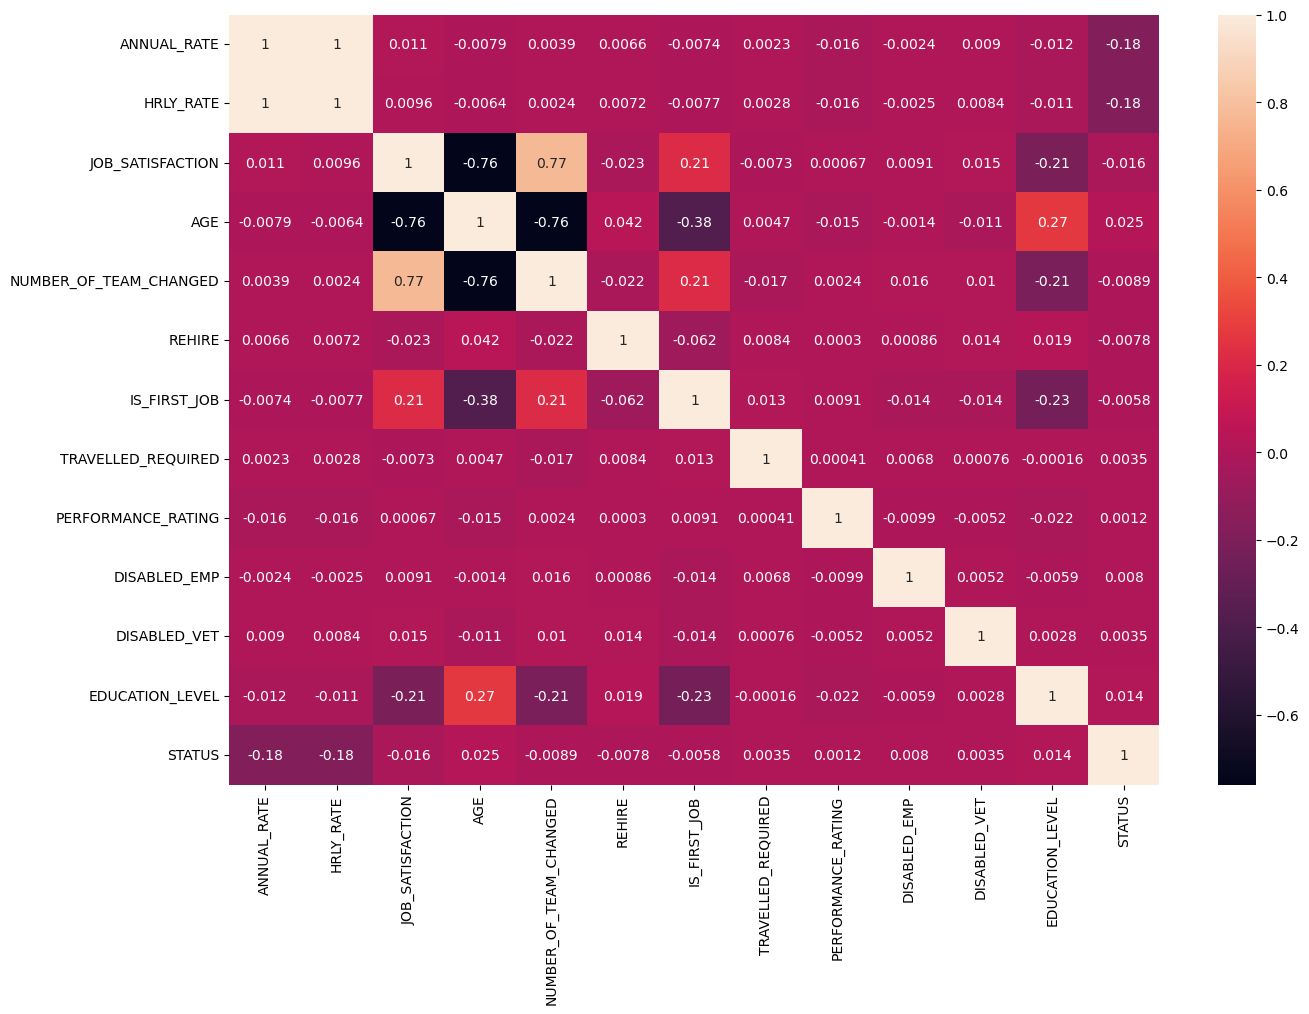

In [12]:
# Correlation Heatmap

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax)

In [13]:
df.drop(['HRLY_RATE'], axis=1, inplace=True)

In [14]:
# One-Hot Encoding categorical features

df['HIRE_MONTH'] = df['HIRE_MONTH'].astype('category')
df['JOB_GROUP'] = df['JOB_GROUP'].astype('category')
df['REFERRAL_SOURCE'] = df['REFERRAL_SOURCE'].astype('category')
df['ETHNICITY'] = df['ETHNICITY'].astype('category')
df['SEX'] = df['SEX'].astype('category')
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].astype('category')
df = pd.get_dummies(df, columns=['HIRE_MONTH', 'JOB_GROUP', 'REFERRAL_SOURCE', 'SEX', 'MARITAL_STATUS', 'ETHNICITY'])

In [15]:
df

,ANNUAL_RATE,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REHIRE,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,...,MARITAL_STATUS_Married,MARITAL_STATUS_Single,ETHNICITY_,ETHNICITY_AMIND,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPA,ETHNICITY_PACIF,ETHNICITY_TWO,ETHNICITY_WHITE
0,33615,4,35,4,0,0,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,70675,3,18,4,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0,0,0
2,34320,5,18,2,0,1,0,3,0,0,...,0,1,0,0,0,0,0,0,0,1
3,103199,2,50,0,1,0,1,2,0,0,...,0,1,0,0,1,0,0,0,0,0
4,141801,4,34,3,0,0,0,4,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,34636,1,43,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
9608,34962,5,28,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
9609,39286,3,31,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
9610,39145,4,32,4,0,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,1


In [16]:
# X = features & y = Target class

X = df.drop(['STATUS'], axis=1)
y = df['STATUS']

In [17]:
# Normalizing the all the features

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [18]:
# Splitting dataset into training and testing split with 70-30% ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODELLING

# Artificial Neural Networks

In [19]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=25, batch_size=16, validation_split = .2)

Epoch 1/25
337/337 [==============================] - 5s 4ms/step - loss: 0.6804 - accuracy: 0.5732 - val_loss: 0.6581 - val_accuracy: 0.6367
Epoch 2/25
337/337 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.6761 - val_loss: 0.6292 - val_accuracy: 0.6545
Epoch 3/25
337/337 [==============================] - 1s 3ms/step - loss: 0.5963 - accuracy: 0.7025 - val_loss: 0.6210 - val_accuracy: 0.6694
Epoch 4/25
337/337 [==============================] - 1s 3ms/step - loss: 0.5677 - accuracy: 0.7263 - val_loss: 0.6245 - val_accuracy: 0.6590
Epoch 5/25
337/337 [==============================] - 1s 3ms/step - loss: 0.5377 - accuracy: 0.7514 - val_loss: 0.6222 - val_accuracy: 0.6530
Epoch 6/25
337/337 [==============================] - 1s 3ms/step - loss: 0.5126 - accuracy: 0.7672 - val_loss: 0.6408 - val_accuracy: 0.6575
Epoch 7/25
337/337 [==============================] - 1s 3ms/step - loss: 0.4830 - accuracy: 0.7893 - val_loss: 0.6493 - val_accuracy: 0.6568
Epoch 

In [21]:
y_pred = model.predict(X_test)
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

91/91 [==============================] - 0s 1ms/step


In [22]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"] )

,Predicted A,Predicted T
Actual A,1270,355
Actual T,608,651


In [23]:
# Calculating metrics

score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.6660887656033287
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      1625
           1       0.65      0.52      0.57      1259

    accuracy                           0.67      2884
   macro avg       0.66      0.65      0.65      2884
weighted avg       0.66      0.67      0.66      2884

